In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Implementation

In [2]:
class K_means:
    def __init__(self, K, distance = 'Euclidean', random_state=2020):
        self.K = K
        self.X = None
        self.centroid = None
        self.cluster = None
        self.distance = distance
        self.random_state = random_state
    
    
    def _Distance(self,x):
        '''
        x: one observation
        return the distance of one observation to all centeriods
        '''
        choice = self.distance
        if choice == 'Euclidean':
            dist = np.sum((x-self.centroid)**2, axis=1)
            return np.sqrt(dist)
        if choice == 'Manhattan':
            dist = np.sum(np.abs(x-self.centroid), axis=1)
            return dist
        if choice == "Chebyshev":
            dist = np.max(np.abs(x-self.centroid), axis=1)
            return dist
    
    def CalCenteriod(self):
        '''
        X: data matrix
        cluster: vector of cluster assignment 
        calculate the centroids
        '''
        for i in np.unique(self.cluster):
            self.centroid[i,:] = np.average(self.X[self.cluster == i, :], axis=0) 
        return self.centroid
    
    def AssignCluster(self):
        '''
        assign the clusters based on the distances from each observation to each of the cluster
        '''
        DISTANCE = np.apply_along_axis(self._Distance, 1, self.X)
        self.cluster = np.argmin(DISTANCE, axis=1)
        return self.cluster
        

    def fit(self,X):
        self.X = X
        self.centroid = np.zeros(shape=(self.K, self.X.shape[1]))
        n = self.X.shape[0]
        p = self.X.shape[1]
        # initilize the clusters
        np.random.seed = self.random_state
        prev_cluster = np.zeros(shape=(n,))
        curr_cluster = np.random.choice(self.K, size=n, replace=True)
        self.cluster = curr_cluster
        while (not np.array_equal(prev_cluster, curr_cluster)): # check if cluster changed
            prev_cluster = curr_cluster
            # update the centeriod
            Centeriod = self.CalCenteriod()
            # update the cluster assignment
            curr_cluster = self.AssignCluster()
        return self.centroid, self.cluster 
    
    def Cost(self):
        '''
        calculate the distance of samples within each cluster
        the formula use here is only applicable for Euclidean distance
        '''
        cost = 0
        for i in range(self.K):
            data = self.X[self.cluster == i, :]
            center = self.centroid[i,:]
            dist = np.sum((data-center)**2, axis=1)
            cost += np.sqrt(np.sum(dist)) * len(dist)
        return cost
    

### Generate a smaple dataset

In [3]:
from sklearn.datasets.samples_generator import make_blobs

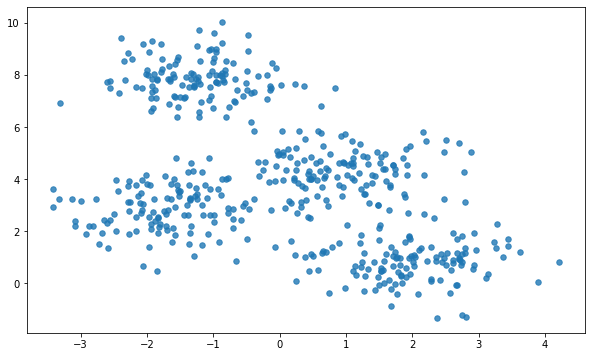

In [4]:
X,y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=0.8, random_state=0)
plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1], s=30, alpha=0.8)
plt.show()

### Mode Evaluation 

In [5]:
kmeans4 = K_means(K=4)
centeriod4, cluster4 = kmeans4.fit(X)

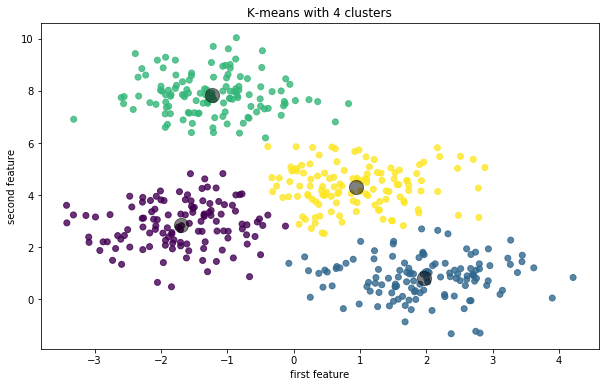

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1], c=cluster4, alpha=0.8)
plt.scatter(centeriod4[:,0], centeriod4[:,1], color='black', s=200, alpha=0.5)
plt.xlabel('first feature')
plt.ylabel('second feature')
plt.title('K-means with 4 clusters')
plt.show()

In [7]:
kmeans3 = K_means(K=3)
centeriod3, cluster3 = kmeans3.fit(X)

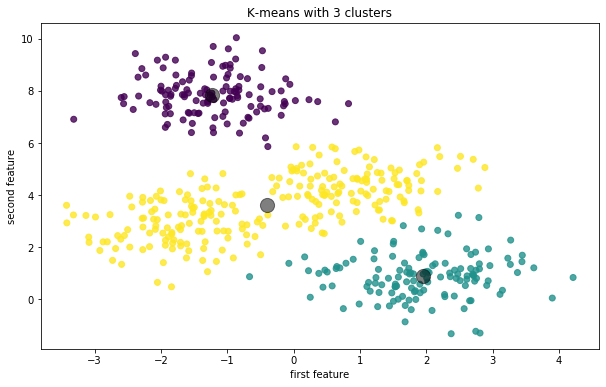

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1], c=cluster3, alpha=0.8)
plt.scatter(centeriod3[:,0], centeriod3[:,1], color='black', s=200, alpha=0.5)
plt.xlabel('first feature')
plt.ylabel('second feature')
plt.title('K-means with 3 clusters')
plt.show()

In [9]:
kmeans5 = K_means(K=5)
centeriod5, cluster5 = kmeans5.fit(X)

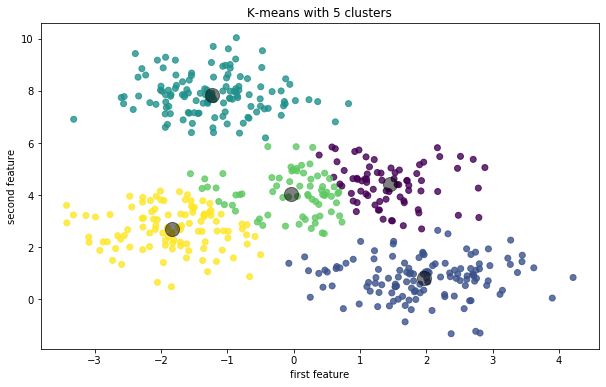

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1], c=cluster5, alpha=0.8)
plt.scatter(centeriod5[:,0], centeriod5[:,1], color='black', s=200, alpha=0.5)
plt.xlabel('first feature')
plt.ylabel('second feature')
plt.title('K-means with 5 clusters')
plt.show()

In [11]:
COST = []
for k in range(1,11):
    kmeans = K_means(k)
    centeriod, cluster = kmeans.fit(X)
    cost = kmeans.Cost()
    COST.append(cost)

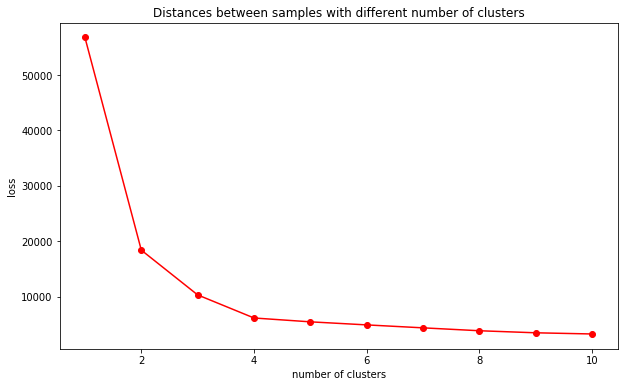

In [12]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(1,11,1), COST, marker='o', color='red')
plt.xlabel('number of clusters')
plt.ylabel('loss')
plt.title('Distances between samples with different number of clusters')
plt.show()

### Compare with sklearn

In [13]:
from sklearn.cluster import KMeans

In [14]:
kmeans = KMeans(n_clusters = 4, random_state = 2020)
cluster = kmeans.fit_predict(X)
centeriod = kmeans.cluster_centers_

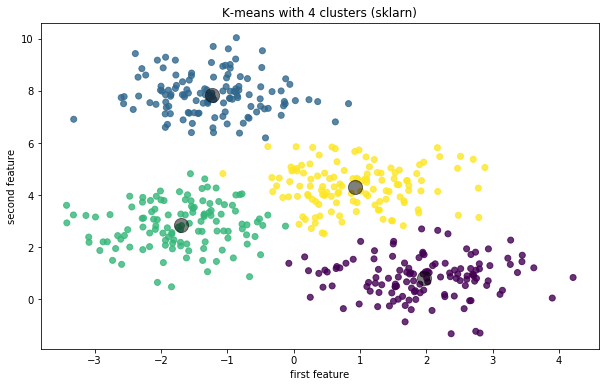

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1], c=cluster, alpha=0.8)
plt.scatter(centeriod[:,0], centeriod[:,1], color='black', s=200, alpha=0.5)
plt.xlabel('first feature')
plt.ylabel('second feature')
plt.title('K-means with 4 clusters (sklarn)')
plt.show()